<a href="https://colab.research.google.com/github/iopebiel/modelo_fraudes_em_cartao/blob/main/regress%C3%A3o_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install imblearn
import pandas as pd
import seaborn as sn
import kagglehub as kh
import os
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from cuml.linear_model import LogisticRegression as cuLogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [55]:
path = kh.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /kaggle/input/creditcardfraud


['creditcard.csv']

In [56]:
data = pd.read_csv("../kaggle/input/creditcardfraud/creditcard.csv")
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Pré processamento dos dados

In [57]:
number_of_fraud = len(data[data.Class == 1])
number_of_normal= len(data[data.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)

Fraude: 492
Normal: 284315


In [62]:
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
counter = Counter(y_train)
print('Base de dados de treino antes do SMOTE:', counter)
counter = Counter(y_test)
print('Base de dados de teste', counter)

Base de dados de treino antes do SMOTE: Counter({0: 199020, 1: 344})
Base de dados de teste Counter({0: 85295, 1: 148})


In [61]:
smt = SMOTE(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('Depois do SMOTE:', counter)

Depois do SMOTE: Counter({0: 199020, 1: 199020})


## **MODELO 1**

In [71]:
logistic_regression = LogisticRegression(solver='saga', max_iter=10000) #Quanto maior o número de iterações, melhor o resultado
logistic_regression.fit(X_train_sm,y_train_sm)
y_pred_rl = logistic_regression.predict(X_train_sm)

In [76]:
dft = pd.DataFrame(data = X_test)
print(dft)
resultado_rl = logistic_regression.predict(dft)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

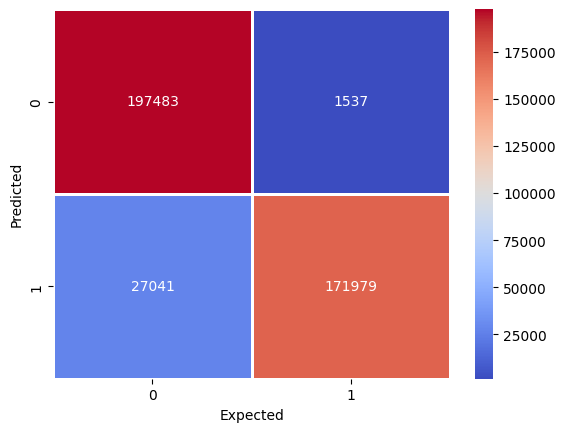

In [77]:
cf_matrix = confusion_matrix(y_train_sm, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

In [78]:
print('Acurracy: ', accuracy_score(y_train_sm, y_pred_rl))
print('Precisão:', precision_score(y_train_sm, y_pred_rl))
print('Recall: ', recall_score(y_train_sm, y_pred_rl))
print('F1 Score: ', f1_score(y_train_sm, y_pred_rl))

Acurracy:  0.9282031956587278
Precisão: 0.9911420272482077
Recall:  0.8641292332428901
F1 Score:  0.9232879506946979


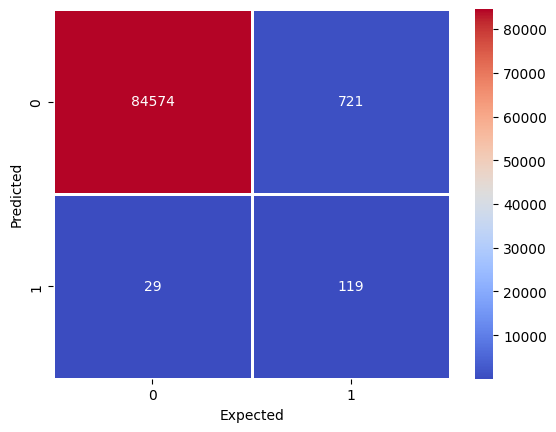

In [79]:
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

In [80]:
print('Acurracy: ', accuracy_score(y_test, resultado_rl))
print('Precisão:', precision_score(y_test, resultado_rl))
print('Recall: ', recall_score(y_test, resultado_rl))
print('F1 Score: ', f1_score(y_test, resultado_rl))

Acurracy:  0.9912222183209859
Precisão: 0.14166666666666666
Recall:  0.8040540540540541
F1 Score:  0.2408906882591093


## **MODELO 2**

In [87]:
logistic_regression = cuLogisticRegression(max_iter=10000, solver='qn')  # qn é equivalente ao saga
logistic_regression.fit(X_train_sm, y_train_sm)
y_pred_curl = logistic_regression.predict(X_train_sm)

In [88]:
dft = pd.DataFrame(data = X_test)
print(dft)
resultado_curl = logistic_regression.predict(dft)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

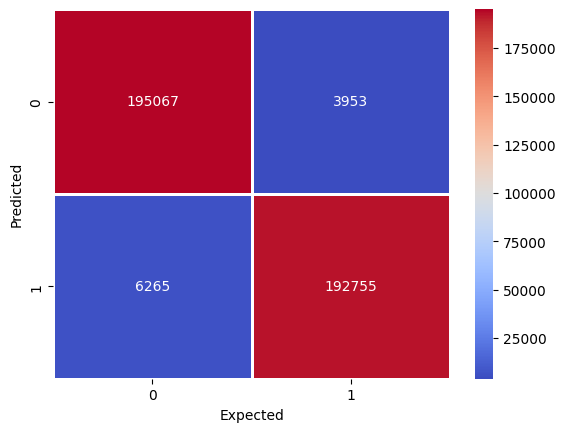

In [89]:
cf_matrix = confusion_matrix(y_train_sm, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

In [90]:
print('Acurracy: ', accuracy_score(y_train_sm, y_pred_curl))
print('Precisão:', precision_score(y_train_sm, y_pred_curl))
print('Recall: ', recall_score(y_train_sm, y_pred_curl))
print('F1 Score: ', f1_score(y_train_sm, y_pred_curl))

Acurracy:  0.9743292131444076
Precisão: 0.9799042235191248
Recall:  0.9685207516832479
F1 Score:  0.9741792342214854


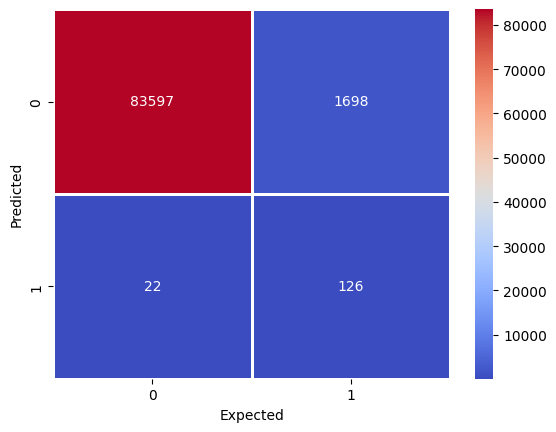

In [91]:
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

In [92]:
print('Acurracy: ', accuracy_score(y_test, resultado_curl))
print('Precisão:', precision_score(y_test, resultado_curl))
print('Recall: ', recall_score(y_test, resultado_curl))
print('F1 Score: ', f1_score(y_test, resultado_curl))

Acurracy:  0.9798696206827944
Precisão: 0.06907894736842106
Recall:  0.8513513513513513
F1 Score:  0.12778904665314403


# **Matriz de confusão**

## RESULTADO DOS TESTES

### **utilizando modelo treinado via sklearn.linear_model**


max_iter=6000

max_iter=10000

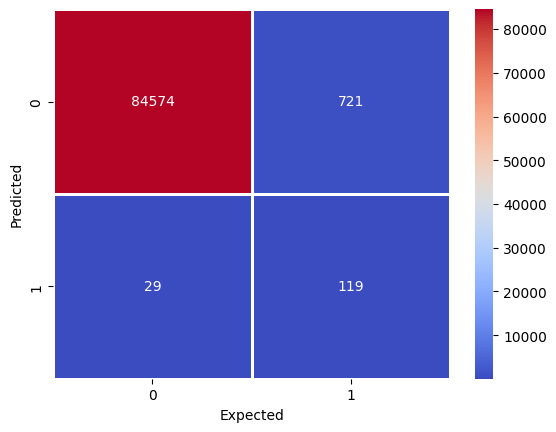

Acurracy:  0.9912222183209859

Precisão: 0.14166666666666666

Recall:  0.8040540540540541

F1 Score:  0.2408906882591093

### **utilizando modelo treinado via mucl.linear_model**



max_iter=200


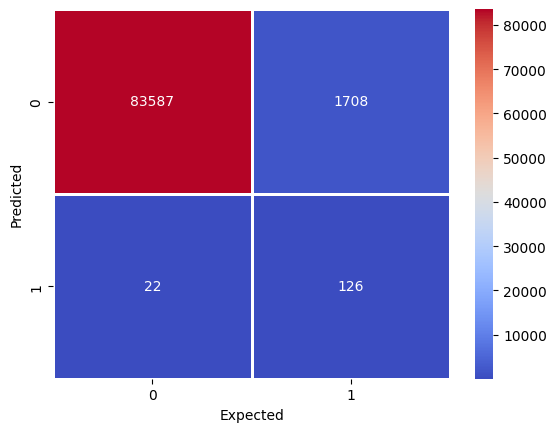

Acurracy:  0.9797525835937408

Precisão: 0.06870229007633588

Recall:  0.8513513513513513

F1 Score:  0.12714429868819374


max_iter = 10000

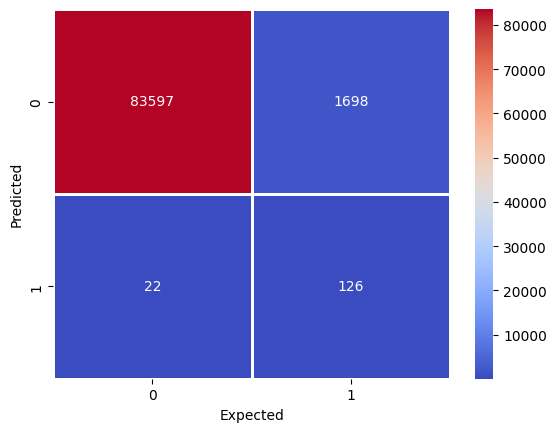

Acurracy:  0.9798696206827944

Precisão: 0.06907894736842106

Recall:  0.8513513513513513

F1 Score:  0.12778904665314403